In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib.animation import FuncAnimation 
from collections import Counter
from datetime import datetime, timedelta
from itertools import count
import random

In [2]:
# Median Developer Salaries by Age
ages = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

In [3]:
# Median Python Developer Salaries by Age
# ages = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

## Part 1: Creating & Customizing Our First Plots

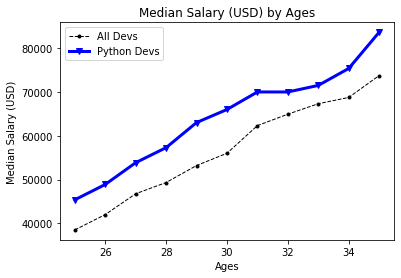

In [4]:
# plt.style.use("ggplot")
# plt.xkcd()

plt.plot(ages, dev_y, label = "All Devs", color = "k", linestyle = "--", marker = ".", linewidth = 1)
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Ages")

plt.plot(ages, py_dev_y, label = "Python Devs", color = "b", linestyle = "-", marker = "v", linewidth = 3)
plt.legend()
# plt.grid(True)
plt.savefig("plot.png")
plt.show()

## Part 2: Bar Charts & Analyzing Data From CSVs

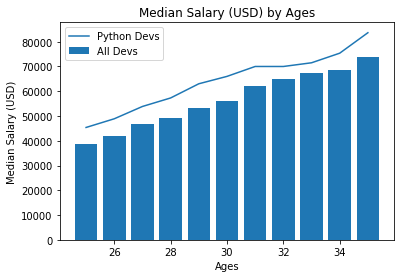

In [5]:
# mix line & bar chart
plt.bar(ages, dev_y, label = "All Devs")
plt.plot(ages, py_dev_y, label = "Python Devs")

plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Ages")
plt.legend()

plt.show()

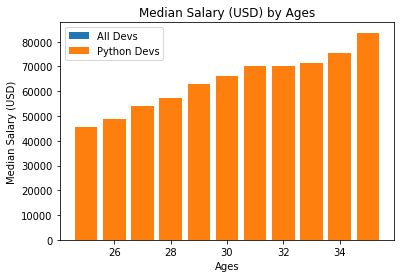

In [6]:
# bar charts produced are stacking onto each other
plt.bar(ages, dev_y, label = "All Devs")
plt.bar(ages, py_dev_y, label = "Python Devs")

plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Ages")
plt.legend()

plt.show()

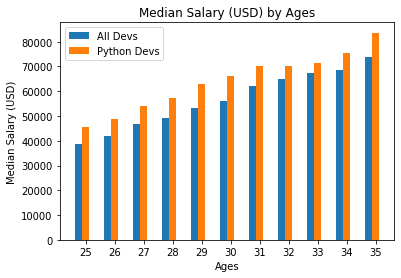

In [7]:
# plot bar chart next to each other
x_indexes = np.arange(len(ages))
width = 0.25

plt.bar(x_indexes - width, dev_y, width = width,label = "All Devs")
plt.bar(x_indexes, py_dev_y, width = width, label = "Python Devs")

plt.xticks(ticks = x_indexes, labels = ages)
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Ages")
plt.legend()

plt.show()

In [8]:
# plot horizontal bar chart
df = pd.read_csv("data_part2.csv")
ids = df["Responder_id"]
lang_responses = df["LanguagesWorkedWith"]
df.head()

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


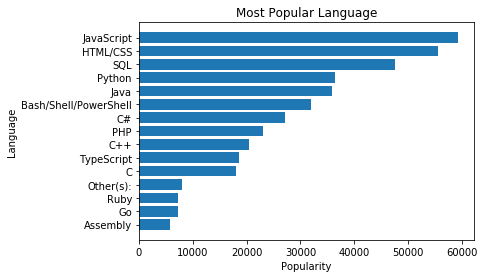

In [9]:
lang_counter = Counter()
for response in lang_responses:
    lang_counter.update(response.split(";"))

languages = []
popularity = []

for item in lang_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])
    
languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)
plt.xlabel("Popularity")
plt.ylabel("Language")
plt.title("Most Popular Language")

plt.show()

## Part 3: Pie Charts

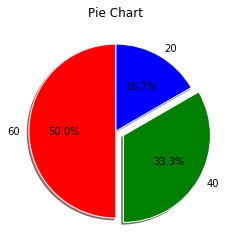

In [10]:
slices = [60, 40, 20]
labels = ["60", "40", "20"]
colors = ["red", "green", "blue"]
explode = [0, 0.1, 0]

plt.pie(slices, labels = labels, colors = colors, explode = explode, startangle = 90,
        shadow = True, autopct = "%1.1f%%", wedgeprops = {"edgecolor": "white"})

plt.title("Pie Chart")
plt.show()

## Part 4: Stack Plots

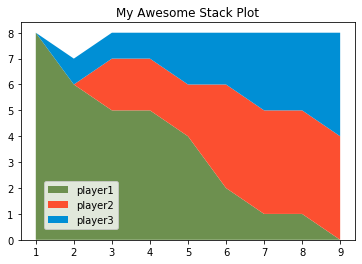

In [11]:
minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 0, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels = ['player1', 'player2', 'player3']
colors = ['#6d904f', '#fc4f30', '#008fd5']

plt.stackplot(minutes, player1,player2, player3, labels = labels, colors = colors)
plt.legend(loc = (0.07, 0.05))
plt.title("My Awesome Stack Plot")
plt.show()

## Part 5: Filling Area on Line Plots

In [12]:
data = pd.read_csv("data_part5.csv")
data.head()

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704


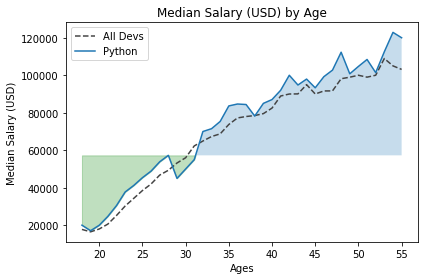

In [13]:
ages = data["Age"]
dev_salaries = data["All_Devs"]
py_salaries = data["Python"]
js_salaries = data["JavaScript"]

plt.plot(ages, dev_salaries, color = "#444444", linestyle = "--", label = "All Devs")
plt.plot(ages, py_salaries, label = "Python")

overall_median = 57287

plt.fill_between(ages, py_salaries, overall_median,
                 where = (py_salaries > overall_median),
                 interpolate = True, alpha = 0.25)

plt.fill_between(ages, py_salaries, overall_median,
                 where = (py_salaries <= overall_median),
                 interpolate = True, alpha = 0.25, color = "green")

plt.legend()
plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

plt.tight_layout()
plt.show()

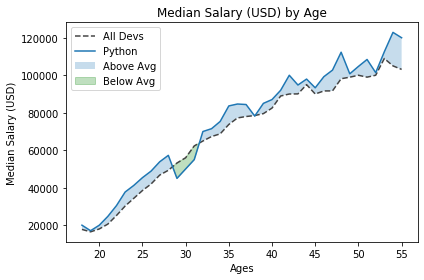

In [14]:
plt.plot(ages, dev_salaries, color = "#444444", linestyle = "--", label = "All Devs")
plt.plot(ages, py_salaries, label = "Python")

plt.fill_between(ages, py_salaries, dev_salaries,
                 where = (py_salaries > dev_salaries),
                 interpolate = True, alpha = 0.25, label = "Above Avg")

plt.fill_between(ages, py_salaries, dev_salaries,
                 where = (py_salaries <= dev_salaries),
                 interpolate = True, alpha = 0.25, color = "green", label = "Below Avg")

plt.legend()
plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

plt.tight_layout()
plt.show()

## Part 6: Histograms

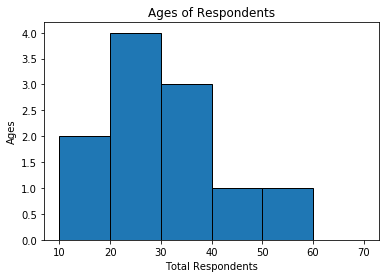

In [15]:
ages = [18, 19, 21, 25, 26, 26, 30, 32, 38, 45, 55]
bins = [10, 20, 30, 40, 50, 60, 70]

plt.hist(ages, bins = bins, edgecolor = "black")

plt.xlabel("Total Respondents")
plt.ylabel("Ages")
plt.title("Ages of Respondents")

plt.show()

In [16]:
data = pd.read_csv("data_part6.csv")
ids = data["Responder_id"]
ages = data["Age"]
data.head()

,Responder_id,Age
0,1,14
1,2,19
2,3,28
3,4,22
4,5,30


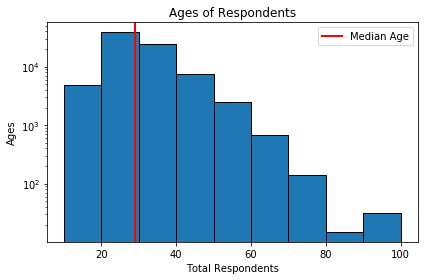

In [17]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
median = 29

plt.axvline(median, color = "red", label = "Median Age", linewidth = 2)
plt.legend()

plt.hist(ages, bins = bins, edgecolor = "black", log = True)

plt.xlabel("Total Respondents")
plt.ylabel("Ages")
plt.title("Ages of Respondents")

plt.tight_layout()
plt.show()

## Part 7: Scatter Plots

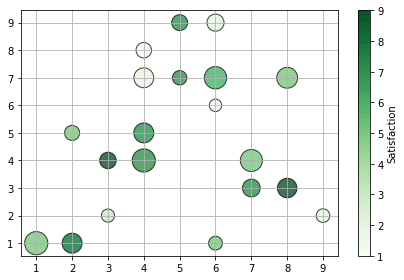

In [18]:
x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]
sizes = [209, 486, 381, 255, 191, 315, 185, 228, 174, 538, 239, 394, 399, 153, 273, 293, 436, 501, 397, 539]

plt.scatter(x,y, s = sizes, c = colors, cmap = "Greens", edgecolor = "black", linewidth = 1, alpha = 0.75)

cbar = plt.colorbar()
cbar.set_label("Satisfaction")

plt.grid()
plt.tight_layout()
plt.show()

In [19]:
data = pd.read_csv("data_part7.csv")
view_count = data["view_count"]
likes = data["likes"]
ratio = data["ratio"]

data.head()

,view_count,likes,ratio
0,8036001,324742,96.91
1,9378067,562589,98.19
2,2182066,273650,99.38
3,6525864,94698,96.25
4,9481284,582481,97.22


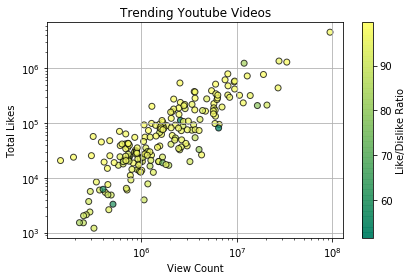

In [20]:
plt.scatter(view_count, likes, edgecolor = "black", c = ratio, cmap = "summer", linewidth = 1, alpha = 0.75)

cbar = plt.colorbar()
cbar.set_label("Like/Dislike Ratio")

plt.title("Trending Youtube Videos")
plt.xlabel("View Count")
plt.ylabel("Total Likes")

plt.xscale("log")
plt.yscale("log")

plt.grid()
plt.tight_layout()
plt.show()

## Part 8: Plotting Time Series Data

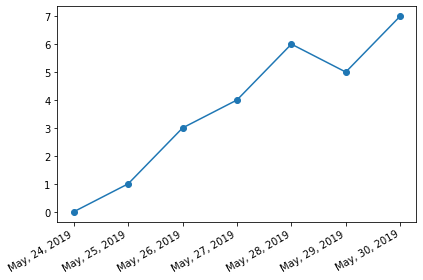

In [21]:
dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]

y = [0, 1, 3, 4, 6, 5, 7]

plt.plot_date(dates, y, linestyle = "solid")

plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter("%b, %d, %Y")
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

In [22]:
data = pd.read_csv("data_part8.csv")

data["Date"] = pd.to_datetime(data["Date"])
data.sort_values("Date", inplace = True)

price_date = data["Date"]
price_close = data["Close"]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-18,7266.080078,8281.660156,7257.259766,8193.139648,8193.139648,723011166
1,2019-05-19,8193.139648,8193.139648,7591.850098,7998.290039,7998.290039,637617163
2,2019-05-20,7998.290039,8102.319824,7807.770020,7947.930176,7947.930176,357803946
3,2019-05-21,7947.930176,8033.759766,7533.660156,7626.890137,7626.890137,424501866
4,2019-05-22,7626.890137,7971.259766,7478.740234,7876.500000,7876.500000,386766321


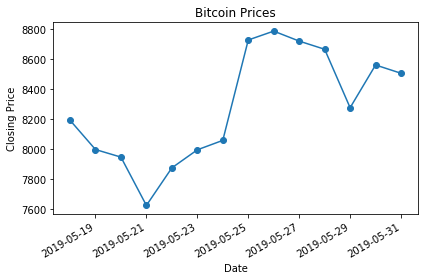

In [23]:
plt.plot_date(price_date, price_close, linestyle = "solid")

plt.gcf().autofmt_xdate()

# date_format = mpl_dates.DateFormatter("%b, %d, %Y")
# plt.gca().xaxis.set_major_formatter(date_format)

plt.title("Bitcoin Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")

plt.tight_layout()
plt.show()

## Part 9: Plotting Live Data in Real Time

In [24]:
# TODO: no graph output. please check why.

def animate(i):
    data = pd.read_csv("data_part9.csv")
    x = data["x_value"]
    y1 = data["total_1"]
    y2 = data["total_2"]

    plt.cla()    
    plt.plot(x, y1, label = "Channel 1")
    plt.plot(x, y2, label = "Channel 2")
    
    plt.legend(loc = "upper left")
    plt.tight_layout()
    
ani = FuncAnimation(plt.gcf(), animate, interval = 1000)

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

## Part 10: Subplots

In [26]:
data = pd.read_csv("data_part10.csv")
ages = data["Age"]
dev_salaries = data["All_Devs"]
py_salaries = data["Python"]
js_salaries = data["JavaScript"]
data.head()

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704


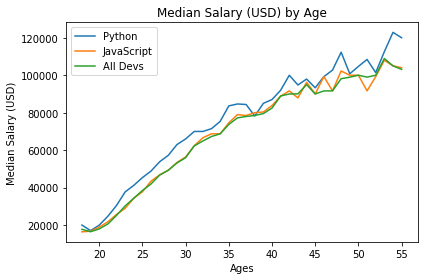

In [29]:
fig, ax = plt.subplots()

ax.plot(ages, py_salaries, label = "Python")
ax.plot(ages, js_salaries, label = "JavaScript")
ax.plot(ages, dev_salaries, label = "All Devs")

ax.legend()
ax.set_title("Median Salary (USD) by Age")
ax.set_xlabel("Ages")
ax.set_ylabel("Median Salary (USD)")

plt.tight_layout()
plt.show()

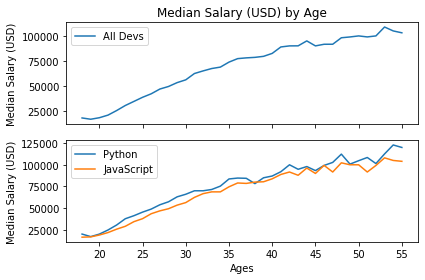

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols  = 1, sharex = True)

ax1.plot(ages, dev_salaries, label = "All Devs")

ax1.legend()
ax1.set_title("Median Salary (USD) by Age")
ax1.set_ylabel("Median Salary (USD)")

ax2.plot(ages, py_salaries, label = "Python")
ax2.plot(ages, js_salaries, label = "JavaScript")

ax2.legend()
ax2.set_xlabel("Ages")
ax2.set_ylabel("Median Salary (USD)")

plt.tight_layout()
plt.show()

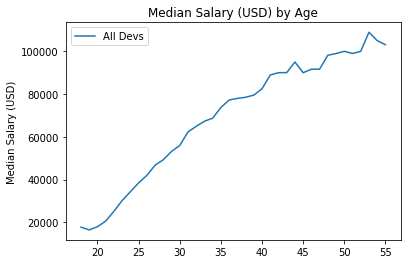

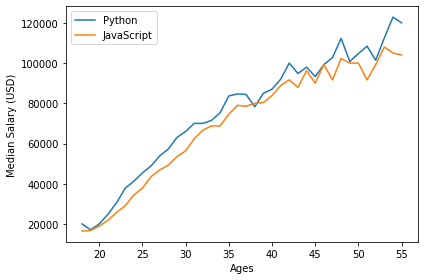

In [39]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(ages, dev_salaries, label = "All Devs")

ax1.legend()
ax1.set_title("Median Salary (USD) by Age")
ax1.set_ylabel("Median Salary (USD)")

ax2.plot(ages, py_salaries, label = "Python")
ax2.plot(ages, js_salaries, label = "JavaScript")

ax2.legend()
ax2.set_xlabel("Ages")
ax2.set_ylabel("Median Salary (USD)")

plt.tight_layout()
plt.show()

fig1.savefig("fig1.png")
fig2.savefig("fig1.png")